In [1]:
from importlib import reload
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.patches import Rectangle
import copy
import os

### Part 1 Optimiser

In [18]:
ann_path = "./data/ANN/sub-graph-0.05/final_result.csv"
bo_path = "./data/BO/sub-graph-0.5/final_result.csv"
random_path =  "./data/Random/3-seed/final_result_best.csv"

In [19]:
ann_data = pd.read_csv(ann_path)
bo_data = pd.read_csv(bo_path)
random_data = pd.read_csv(random_path)

In [20]:
def get_data(data, random = False, NUM_SAMPLES=100, NUM_AGENT=4, NUM_DATASET=1):
    if random:
        data['vordir_cost'] = data['cost']
        data['vordir_conmax'] = data['vordir_max']
        data['vordir_cost'] = pd.to_numeric( data['vordir_cost'],errors='coerce')
        data['vordir_ft'] = pd.to_numeric( data['vordir_ft'],errors='coerce')
        data['vordir_u1'] = pd.to_numeric( data['vordir_u1'],errors='coerce')
        data['vordir_u2'] = pd.to_numeric( data['vordir_u2'],errors='coerce')
        data['vordir_conmax'] = pd.to_numeric( data['vordir_conmax'],errors='coerce')
        data['vordir_penality'] = pd.to_numeric( data['vordir_penality'],errors='coerce')
        
        ann1 = data.loc[data['Dataset']== NUM_DATASET]
        ann2 = ann1.loc[ann1['NUM_AGENT']== NUM_AGENT]
    else:
        data['vordir_cost'] = pd.to_numeric( data['vordir_cost'],errors='coerce')
        data['vordir_ft'] = pd.to_numeric( data['vordir_ft'],errors='coerce')
        data['vordir_u1'] = pd.to_numeric( data['vordir_u1'],errors='coerce')
        data['vordir_u2'] = pd.to_numeric( data['vordir_u2'],errors='coerce')
        data['vordir_conmax'] = pd.to_numeric( data['vordir_conmax'],errors='coerce')
        data['vordir_penality'] = pd.to_numeric( data['vordir_penality'],errors='coerce')
        ann0 = data.loc[data['Samples'] == NUM_SAMPLES]
        ann1 = ann0.loc[ann0['Dataset']== NUM_DATASET]
        ann2 = ann1.loc[ann1['Agent']== NUM_AGENT]

    return ann2


In [21]:
def compare_cost_percentage_decrease(pd1,pd2,pd3, attr='vordir_cost'):
    a = pd1[attr].values[0]
    b = pd2[attr].values[0]
    c = pd3[attr].values[0]
    
    if a == 0:
        return b, c
    
    diff2 = (a - b)/a
    diff3 = (a - c)/a
    return diff2, diff3

In [22]:
def compare_cost_percentage_increase(pd1,pd2,pd3, attr='vordir_cost'):
    a = pd1[attr].values[0]
    b = pd2[attr].values[0]
    c = pd3[attr].values[0]
    
    if a == 0:
        return b, c
    
    diff2 = (b - a)/a
    diff3 = (c - a)/a
    return diff2, diff3

In [23]:
NUM_SAMPLES = str(100)
NUM_AGENT = str(8)
num_dataset_list = [1,2,3,4,5]
attr_list = ['vordir_cost', 'vordir_ft', 'vordir_conmax', 'vordir_u1', 'vordir_u2', 'vordir_penality']
# attr_list = ['vordir_cost', 'vordir_ft', 'vordir_conmax', 'vordir_u1', 'vordir_u2']

ann_per_decrease = np.zeros((len(num_dataset_list),len(attr_list)))
bo_per_decrease =  np.zeros((len(num_dataset_list),len(attr_list)))
ann_avg = np.zeros((len(attr_list)))
bo_avg = np.zeros((len(attr_list)))
data = {'ANN': [], 'BO': []}

for dataset_idx, NUM_DATASET in enumerate(num_dataset_list):
    NUM_DATASET = str(NUM_DATASET)
    rand = get_data(random_data, random = True, NUM_AGENT=NUM_AGENT, NUM_DATASET=NUM_DATASET)
    ann = get_data(ann_data, NUM_SAMPLES=NUM_SAMPLES, NUM_AGENT=NUM_AGENT, NUM_DATASET=NUM_DATASET)
    bo = get_data(bo_data, NUM_SAMPLES=NUM_SAMPLES, NUM_AGENT=NUM_AGENT, NUM_DATASET=NUM_DATASET)
    
    for idx, attr in enumerate(attr_list):
        if attr == 'vordir_u1' or attr == 'vordir_u2':
            ann_rand, bo_rand = compare_cost_percentage_increase(rand, ann, bo, attr=attr)
        else:
            ann_rand, bo_rand = compare_cost_percentage_decrease(rand, ann, bo, attr=attr)
            
        ann_per_decrease[dataset_idx, idx]=ann_rand
        bo_per_decrease[dataset_idx, idx]=bo_rand
        ann_avg[idx] += ann_rand
        bo_avg[idx] += bo_rand

for idx in range(len(attr_list)):
    ann_avg[idx] /= len(num_dataset_list)
    bo_avg[idx] /= len(num_dataset_list)
    ann_sd = np.std(ann_per_decrease[:, idx])
    bo_sd = np.std(bo_per_decrease[:, idx])
    data['ANN'].append(ann_avg[idx])
    data['ANN'].append(ann_sd)
    data['BO'].append(bo_avg[idx])
    data['BO'].append(bo_sd)

results = pd.DataFrame.from_dict(data, orient='index',
                       columns=['Cost Average', 'Cost SD', 
                                'FT Average', 'FT SD',  
                                'Con Average', 'Con SD',
                                'U1 Average', 'U1 SD', 
                                'U2 Average', 'U2 SD',
                                'Penality Average', 'Penality SD'])


### 4 Agent - 100 Samples [Improvements w.r.t. to Random Methods]
- more positive the better except penality

In [54]:
results

,Cost Average,Cost SD,FT Average,FT SD,Con Average,Con SD,U1 Average,U1 SD,U2 Average,U2 SD,Penality Average,Penality SD
ANN,-5.339883,10.389287,0.082565,0.184498,0.0,0.0,-0.116227,0.125538,0.055394,0.224441,8.051767,16.103534
BO,0.122291,0.097719,-0.111021,0.123216,0.1,0.2,0.288079,0.229395,-0.136743,0.080381,0.000000,0.000000


### 8 Agent - 100 Samples [Improvements w.r.t. to Random Methods]

In [24]:
results

,Cost Average,Cost SD,FT Average,FT SD,Con Average,Con SD,U1 Average,U1 SD,U2 Average,U2 SD,Penality Average,Penality SD
ANN,-9.148462,18.047046,0.043895,0.172512,-0.033333,0.266667,-0.067087,0.058947,-0.052007,0.108826,13.978191,27.956383
BO,0.078771,0.050577,-0.031725,0.060732,-0.033333,0.266667,0.125774,0.116704,-0.018561,0.026862,0.000000,0.000000


### Part 2 Optimiser

In [137]:
# fig = sb.relplot(x="Agent", y="ft_vor2_grid", kind="line", ci="sd", data=data, hue='Objective')
# fig.set(xticks=num_agent_list)

In [2]:
part2_path = "./data/Part2/final_result.csv"
part2_data = pd.read_csv(part2_path)
num_agent_list = [4,8,12]
# NUM_AGENT = str(2)
# NUM_DATASET = str(1)

In [3]:
# data.loc[(data['Dataset'] == NUM_DATASET) & (data['Objective'] == 'Distance')]
def from_objective(obj = 'Distance', attr=None, scheme=None):
    df1 = pd.DataFrame()
    data = part2_data.loc[part2_data['Objective'] == obj]
    df1['Agent'] = pd.to_numeric( data['Agent'],errors='coerce')
    df1['grid_ft'] = pd.to_numeric( data['grid_ft'],errors='coerce')
    
    target = scheme + '_' + attr
#     target_col = attr + '_' + scheme + '_grid'
    target_col = 'y'
    
    df1[target] = pd.to_numeric( data[target],errors='coerce')
    df1 = df1.loc[df1['Agent'] != 2]
    df1[target_col] = (df1[target]-df1['grid_ft'])/df1['grid_ft']
    
    df1['Objective'] = obj
    df1['Attribute'] = attr
    df1['Scheme'] = scheme
    return df1


In [4]:
scheme_list = ['vor', 'vordir']
attr_list = ['ft', 'max', 'u1', 'u2']
# attr_list = ['ft', 'u1']

data1 = pd.DataFrame()
for s_i, scheme in enumerate (scheme_list): 
    for a_i, attr in enumerate (attr_list):
        print("attr", attr, "scheme", scheme)
        df1 = from_objective(obj = 'Distance', attr= attr, scheme=scheme)
        df2 = from_objective(obj = 'Capacity', attr= attr, scheme=scheme)
        df3 = from_objective(obj = 'Both', attr= attr, scheme=scheme)
        if s_i == 0 and a_i == 0:
            data1 = df1
#         else:
#             data1 = data1.append(df1, ignore_index=True, sort=False)
#         data1 = data1.append(df2, ignore_index=True, sort=False)
#         data1 = data1.append(df3, ignore_index=True, sort=False)
        
        data1 = pd.concat([data1,df1,df2,df3], axis=0)

attr ft scheme vor
attr max scheme vor
attr u1 scheme vor
attr u2 scheme vor
attr ft scheme vordir
attr max scheme vordir
attr u1 scheme vordir
attr u2 scheme vordir


### Compare Objective Function [Percentage Change w.r.t. to Grid Methods]

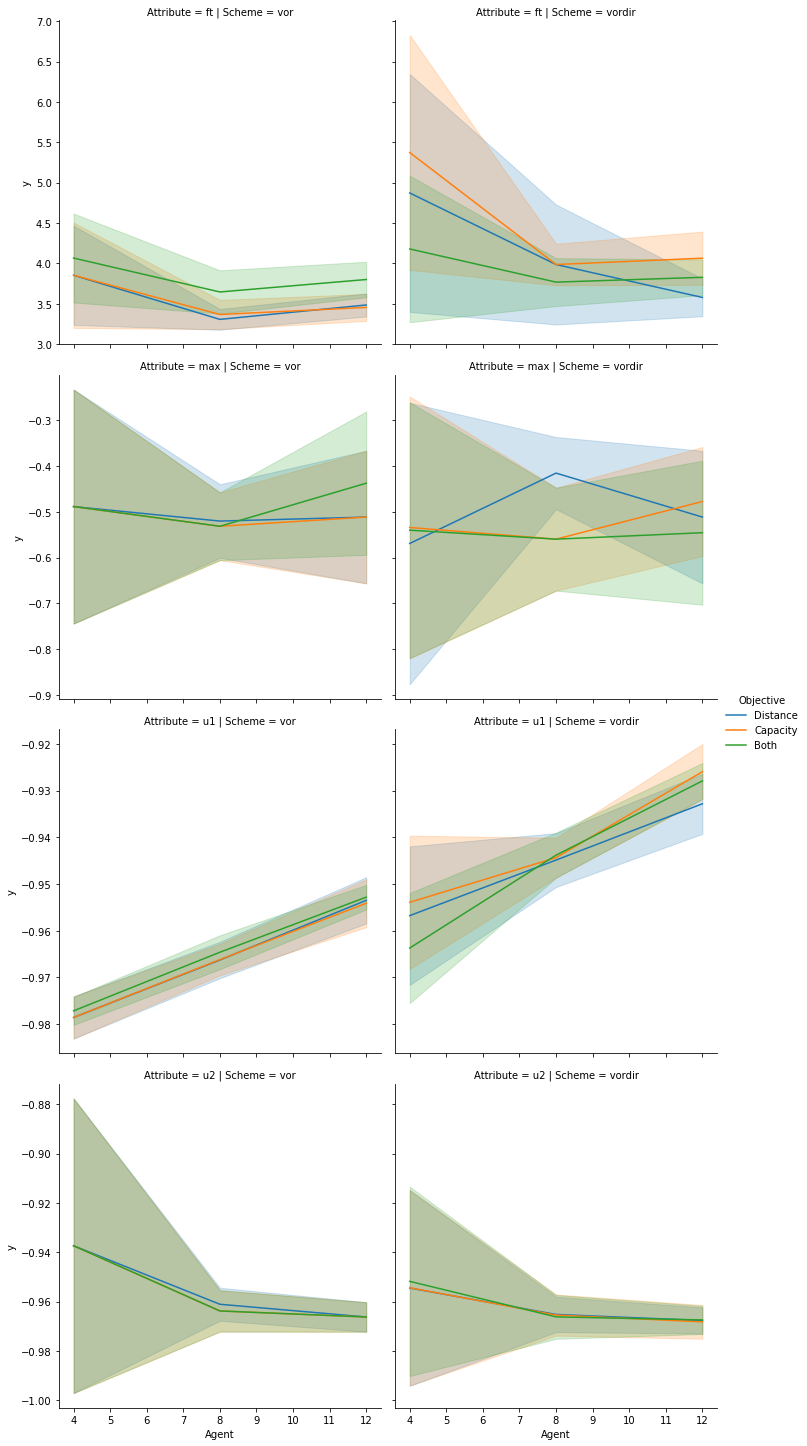

In [5]:
ax = sb.relplot(data=data1, 
                x="Agent", 
                y="y", 
                hue="Objective", 
                col="Scheme", 
                row = "Attribute",  
                kind="line", 
                ci="sd",
                facet_kws={'sharey': "row", 'sharex': True})

### Compare Scheme[Percentage Change w.r.t. to Grid Methods]

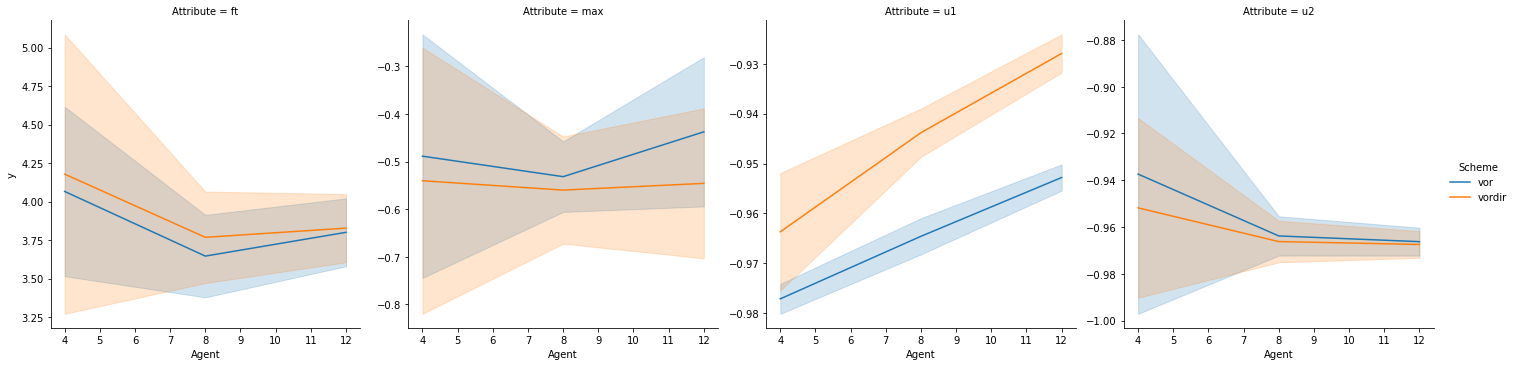

In [17]:
data2 = data1.loc[data1['Objective'] == 'Both']

rel = sb.relplot(data=data2, 
                x="Agent", 
                y="y", 
                hue="Scheme", 
                col = "Attribute",  
                kind="line", 
                ci="sd",
                facet_kws={'sharey': "col", 'sharex': True})

In [93]:
# ax = sb.pointplot(x="Agent", y="ft_vor2_grid", data=data, hue='Objective', dodge=True)

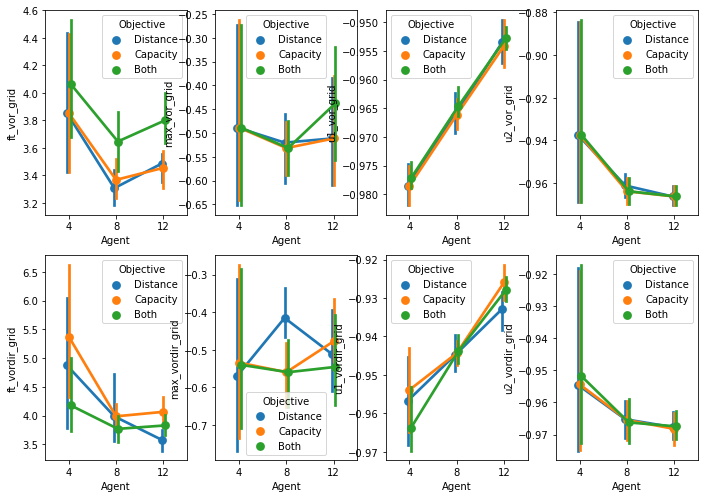

In [9]:
def from_objective(obj = 'Distance', attr=None, scheme=None):
    df1 = pd.DataFrame()
    data = part2_data.loc[part2_data['Objective'] == obj]
    df1['Agent'] = pd.to_numeric( data['Agent'],errors='coerce')
    df1['grid_ft'] = pd.to_numeric( data['grid_ft'],errors='coerce')
    
    target = scheme + '_' + attr
    target_col = attr + '_' + scheme + '_grid'
#     target_col = 'y'
    
    df1[target] = pd.to_numeric( data[target],errors='coerce')
    df1 = df1.loc[df1['Agent'] != 2]
    df1[target_col] = (df1[target]-df1['grid_ft'])/df1['grid_ft']
    
    df1['Objective'] = obj
    df1['Attribute'] = attr
    df1['Scheme'] = scheme
    return df1



scheme_list = ['vor', 'vordir']
attr_list = ['ft', 'max', 'u1', 'u2']

a4_dims = (11.7, 8.27)
fig, axes = plt.subplots(len(scheme_list), len(attr_list), figsize=a4_dims)

for s_i, scheme in enumerate (scheme_list): 
    for a_i, attr in enumerate (attr_list):
        df1 = from_objective(obj = 'Distance', attr= attr, scheme=scheme)
        df2 = from_objective(obj = 'Capacity', attr= attr, scheme=scheme)
        df3 = from_objective(obj = 'Both', attr= attr, scheme=scheme)
        data = df1.append(df2)
        data = data.append(df3)

        target = scheme + '_' + attr
        target_col = attr + '_' + scheme + '_grid'

        sb.pointplot(x="Agent", y=target_col, data=data, hue='Objective', dodge=True, ax = axes[s_i,a_i])